<a href="https://colab.research.google.com/github/clrssxa/ClusteringProject/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Clustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Digital Skola/Project 5/segmentation_data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [ ]:
df.isna().any()

ID                 False
Sex                False
Marital status     False
Age                False
Education          False
Income             False
Occupation         False
Settlement size    False
dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [ ]:
df = df.drop(['ID'], axis = 1)

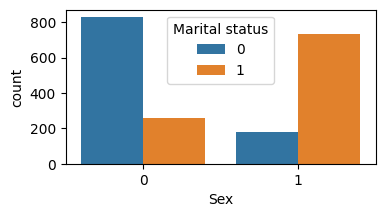

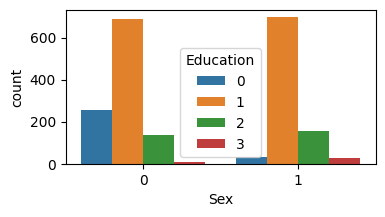

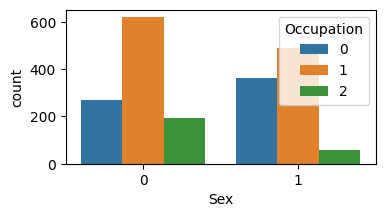

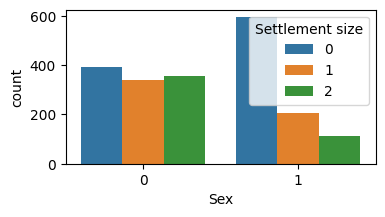

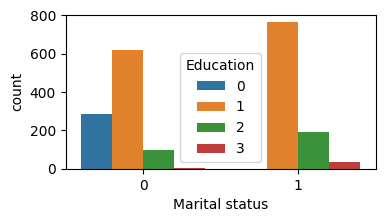

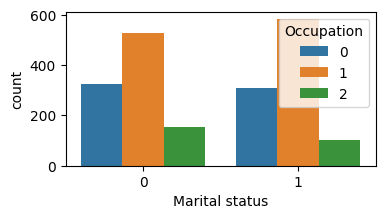

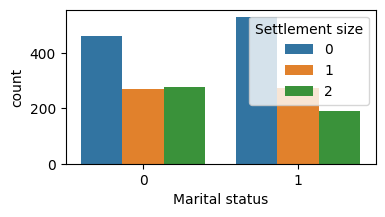

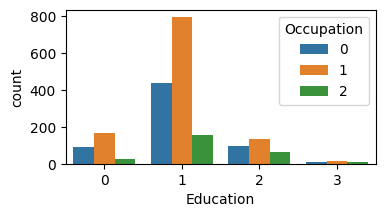

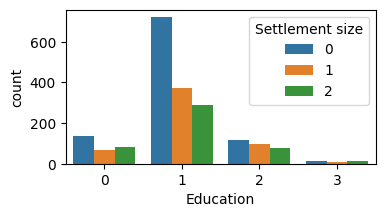

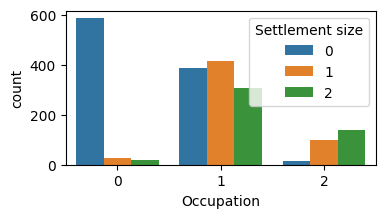

In [ ]:
categories = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

cat_aux = categories.copy()

for cat1 in categories:
  cat_aux.pop(0);
  for cat2 in cat_aux:
    if cat1 != cat2:
      plt.figure(figsize=(4,2))
      sns.countplot(data=df, x=cat1, hue=cat2)

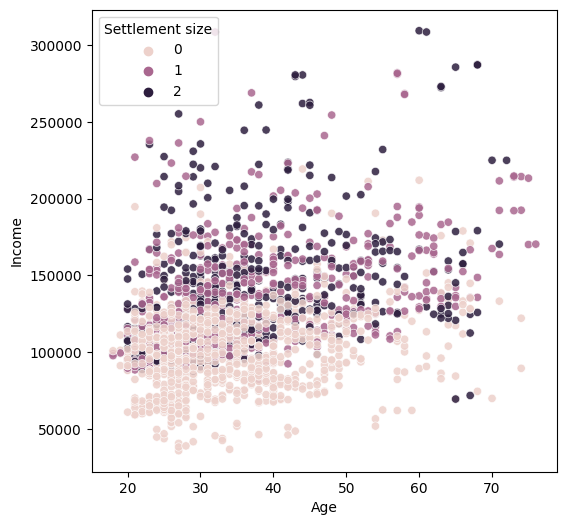

In [ ]:
def biv_scatter(x, y, hue, df=df):
  plt.figure(figsize=(6,6))
  sns.scatterplot(x=x, y=y, hue=hue, alpha=0.85)

biv_scatter(df['Age'], df['Income'], hue=df['Settlement size'])

#Feature Transforming & Scalling


> H0 : Distribusi Normal ; H1: Distribusi Tidak Normal



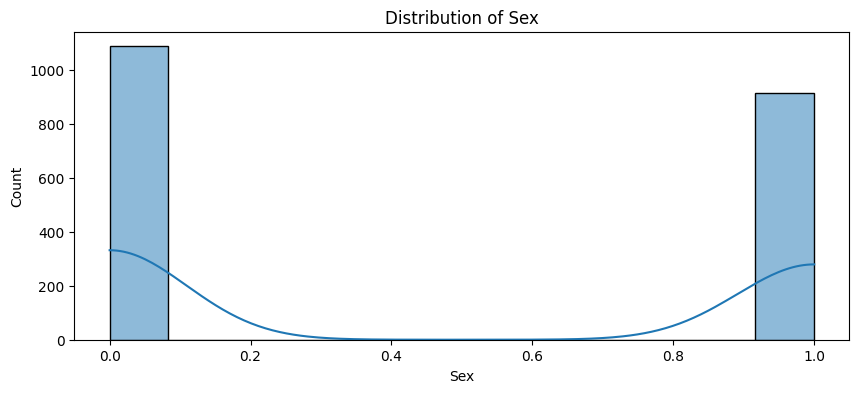

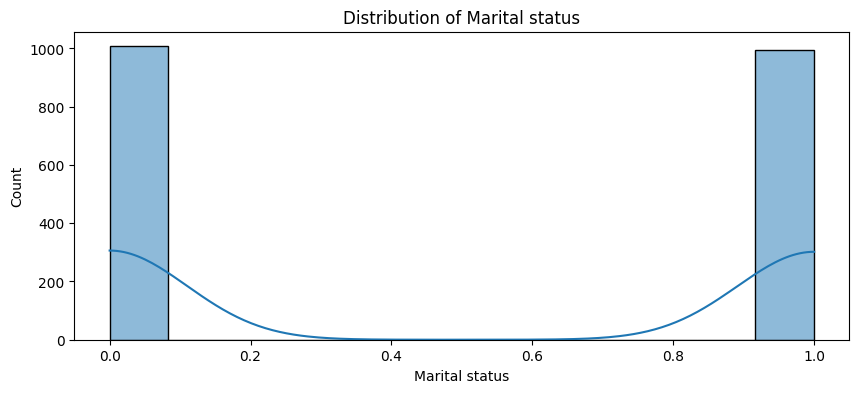

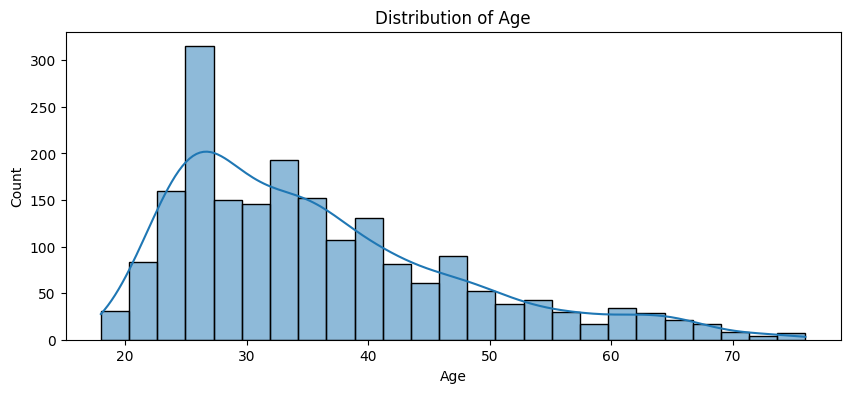

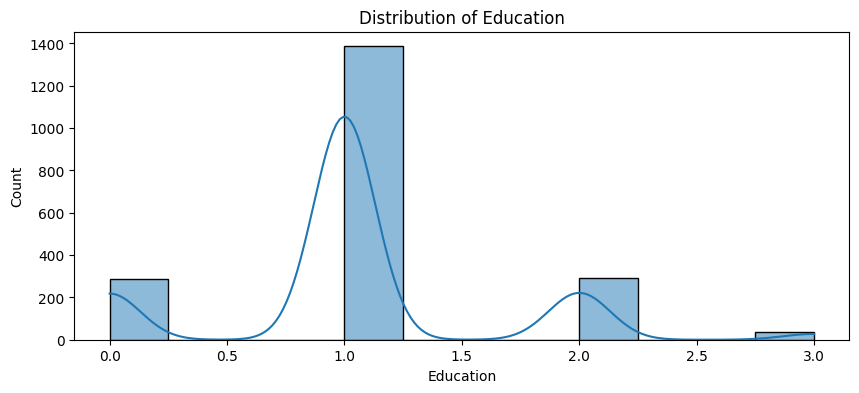

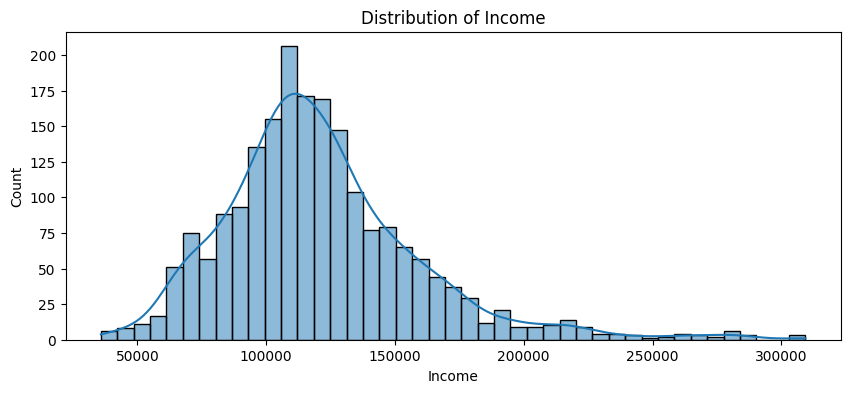

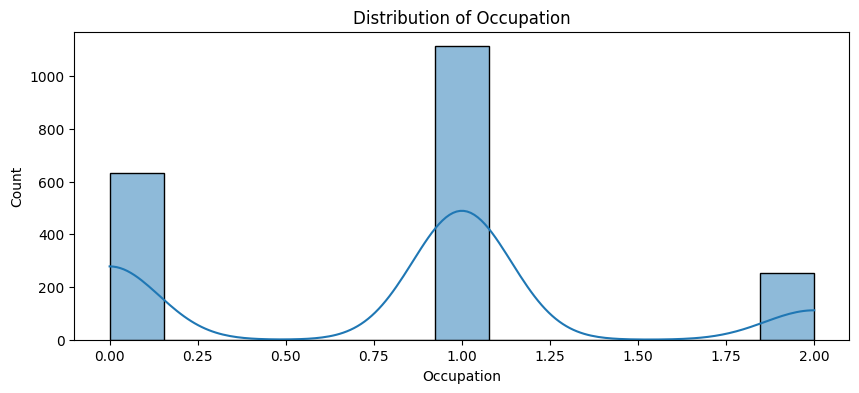

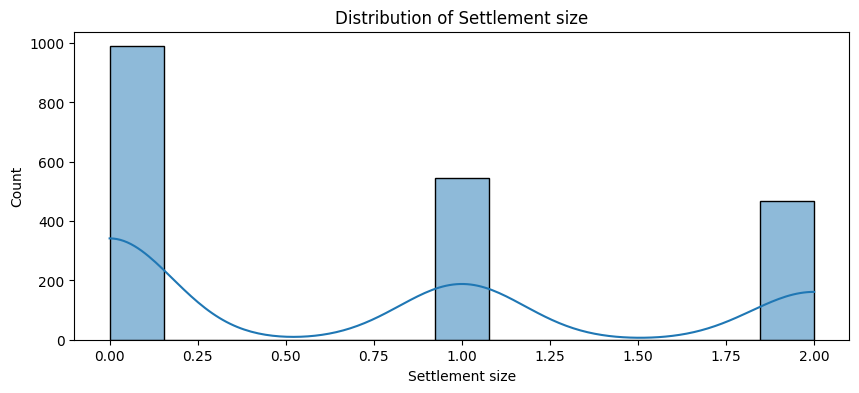

In [ ]:
for feature in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

Distribusi Age dan icome bisa diliat paling ga seimbang (ga normal)

In [ ]:
# cek p value age dan income biar mastiin bener bener distribusinya masuk H1

from scipy import stats

result_normal_income = stats.normaltest(df['Income'])[1]
result_normal_age = stats.normaltest(df['Age'])[1]

#f digunakan untuk memudahkan interpolasi string

print(f'p-value Income: {result_normal_income}')
print(f'p-value Age: {result_normal_age}')

p-value Income: 2.5009638879187734e-98
p-value Age: 3.3428344869999675e-56


In [ ]:
from sklearn.preprocessing import PowerTransformer

def apply_log(columns):
  return np.log(columns)

def normality_test(columns):
  return stats.normaltest(columns)

Feature Income

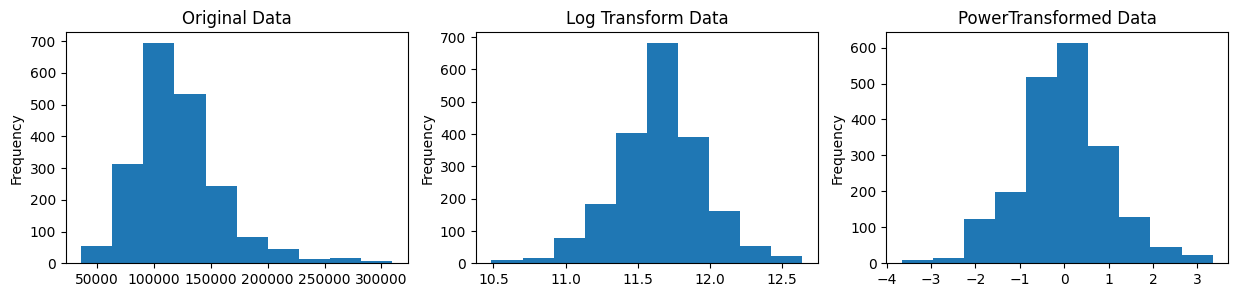

In [ ]:
#PowerTransform data
from sklearn.preprocessing import PowerTransformer

feature = df['Income'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_trans = powtr.fit_transform(feature)
array_1d = feature_trans.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

#log transform data
logTrans_income = apply_log(df['Income'])

#plot original datra dan transform data
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,3))

#Plot original data and get metrics
df['Income'].plot(kind='hist', ax = ax1)
ax1.title.set_text('Original Data')
norm_test1 = normality_test(df['Income'])

#plot transform data and get metrics
logTrans_income.plot(kind='hist', ax = ax2);
ax2.title.set_text('Log Transform Data')
norm_test2 = normality_test(logTrans_income)

#Plot power transform data and get metrics
feature.plot(kind='hist', ax = ax3);
ax3.title.set_text('PowerTransformed Data')
norm_test3 = normality_test(feature)

norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original Data', 'Log transform', 'PowerTransformer'])

In [ ]:
metrics

,statistic,pvalue
Original Data,449.473326,2.500964e-98
Log transform,32.357037,9.413664e-08
PowerTransformer,27.859212,8.921730e-07


Feature Age

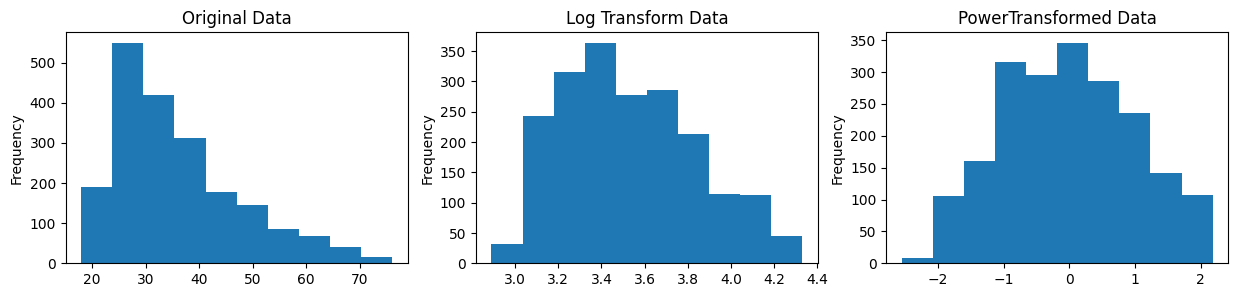

In [ ]:
#PowerTransform data
from sklearn.preprocessing import PowerTransformer

feature2 = df['Age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_trans = powtr.fit_transform(feature2)
array_1d = feature_trans.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

#log transform data
logTrans_age = apply_log(df['Age'])

#plot original datra dan transform data
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,3))

#Plot original data and get metrics
df['Age'].plot(kind='hist', ax = ax1)
ax1.title.set_text('Original Data')
norm_test1A = normality_test(df['Age'])

#plot transform data and get metrics
logTrans_age.plot(kind='hist', ax = ax2);
ax2.title.set_text('Log Transform Data')
norm_test2A = normality_test(logTrans_age)

#Plot power transform data and get metrics
feature2.plot(kind='hist', ax = ax3);
ax3.title.set_text('PowerTransformed Data')
norm_test3A = normality_test(feature2)

norm_results = [norm_test1A, norm_test2A, norm_test3A]
metrics = pd.DataFrame(norm_results, index=['Original Data', 'Log transform', 'PowerTransformer'])

In [ ]:
metrics

,statistic,pvalue
Original Data,255.475892,3.342834e-56
Log transform,111.094201,7.519703e-25
PowerTransformer,161.196197,9.924088e-36


Berarti Income pake power transform, age pake log transform (liat nilainya paling mendekati p value 0.05 yang mana)

In [ ]:
df['transf_income'] = feature
df['transf_age'] = logTrans_age

In [ ]:
df_transf = df.drop(['Income', "Age",], axis=1)[:]
df_transf

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,0.209208,3.850148
1996,1,1,1,1,0,0.051991,3.295837
1997,0,0,0,0,0,-0.948374,3.433987
1998,1,1,1,0,0,-0.545364,3.178054


# Feature Scalling : MinMaxScaller

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df_transf)

In [ ]:
X

array([[0.        , 0.        , 0.66666667, ..., 1.        , 0.55651051,
        0.91249369],
       [1.        , 1.        , 0.33333333, ..., 1.        , 0.64653199,
        0.13931967],
       [0.        , 0.        , 0.33333333, ..., 0.        , 0.40143673,
        0.69527579],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.38683111,
        0.37741596],
       [1.        , 1.        , 0.33333333, ..., 0.        , 0.44439599,
        0.19972907],
       [0.        , 0.        , 0.        , ..., 0.        , 0.28149211,
        0.22807056]])

#Clustering

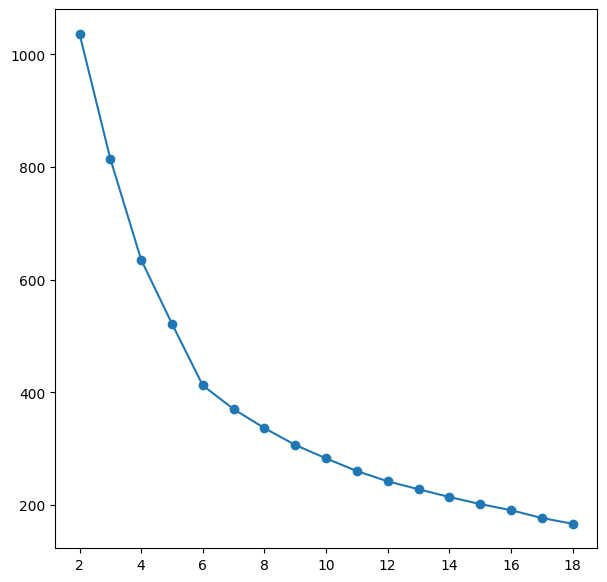

In [ ]:
from sklearn.cluster import KMeans

cluster_range = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

#mengukur performa KMeans, semakin tinggi, semakin jelek performa KMeans
inertias = []

for c in cluster_range:
  kmeans = KMeans(n_clusters=c, random_state=0).fit(X)
  inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(cluster_range, inertias, marker='o')

Silhoutte Score

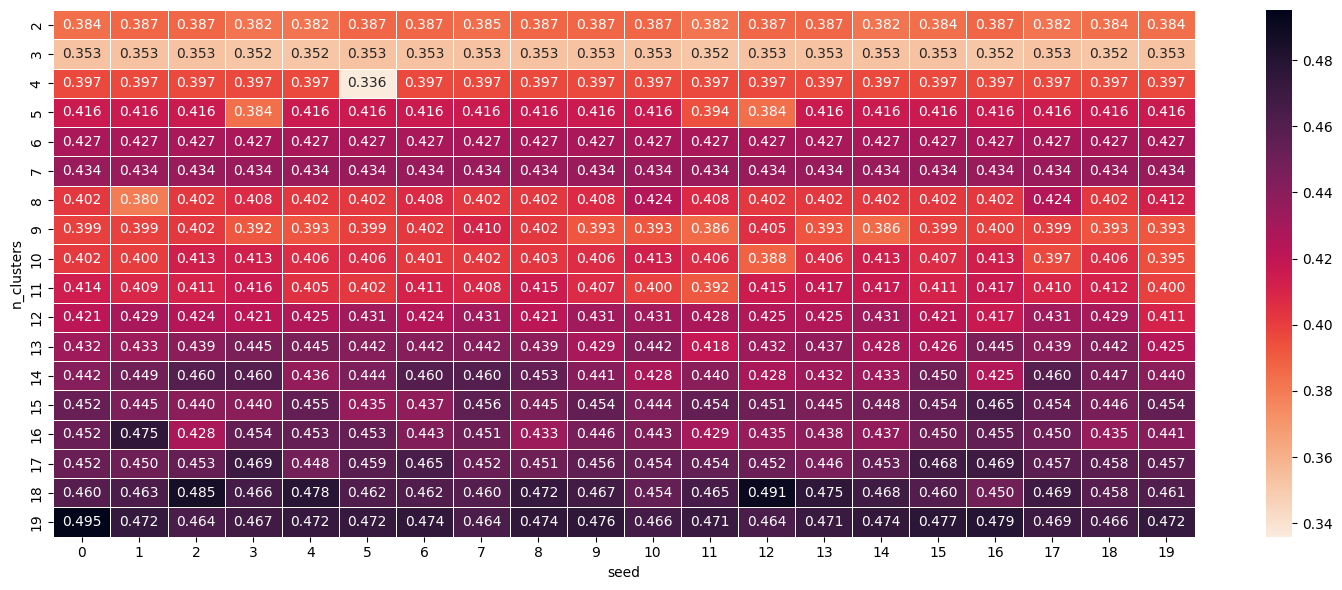

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,20)
random_range = range(0,20)
results = []

for c in clusters_range:
  for r in random_range:
    clusterer = KMeans(n_clusters=c, random_state=r)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X, cluster_labels)
    results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=['n_clusters', 'seed', 'silhouette_avg'])
pivot_kn = pd.pivot_table(result, index='n_clusters', columns='seed', values='silhouette_avg')

plt.figure(figsize=(15,6))
sns.heatmap(pivot_kn, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()


silhouette score menunjukkan seberapa jauh dekat antar titik dalam sebuah cluster dan seberapa jauh jarak antar titik, antar cluster.

Karena itu, dipilih untuk membuat 6/7 cluster

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=3)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [ ]:
kmeans=KMeans(n_clusters=6, random_state=3).fit(X)
labels = kmeans.labels_

X_pca_df['Labels'] = labels
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

X_pca_df.head()


,X1,X2,X3,Labels
0,0.829143,0.350518,-0.162403,2
1,-0.531854,0.719504,-0.230299,5
2,0.489493,-0.693627,0.175269,1
3,0.712487,-0.027906,-0.049583,2
4,0.718334,-0.036815,-0.052850,2


#Visualizaton

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z="X3",
                    color=X_pca_df['Labels'])

fig.show()

In [ ]:
results_df = df.drop(['transf_income','transf_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Age':'int32', 'Education':'int32', 'Income':'int32', 'Occupation':'int32', 'Settlement size':'int32',})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int32
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int32
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(8)
memory usage: 62.6 KB


In [ ]:
summary = {}

for index in range(6):
  summary[index] = results_df[results_df['Labels'] == index].describe().T

Cluster 0


In [ ]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Sex,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Marital status,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,430.0,32.416279,10.911221,18.0,25.00,28.5,36.00,71.0
Education,430.0,1.211628,0.467453,1.0,1.00,1.0,1.00,3.0
Income,430.0,102142.332558,25801.373992,35832.0,86281.25,102323.5,120459.25,207262.0
Occupation,430.0,0.427907,0.495352,0.0,0.00,0.0,1.00,1.0
Settlement size,430.0,0.011628,0.107329,0.0,0.00,0.0,0.00,1.0
Labels,430.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

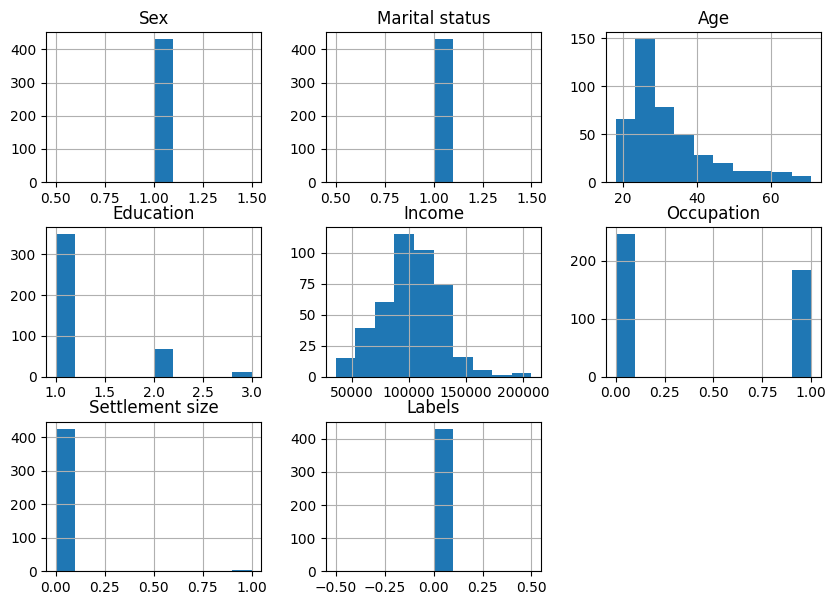

In [ ]:
results_df[results_df['Labels'] == 0].hist(figsize=(10,7))

Cluster 1

In [ ]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Sex,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Marital status,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age,312.0,37.567308,10.633108,21.0,29.75,36.0,42.00,74.0
Education,312.0,0.737179,0.579524,0.0,0.00,1.0,1.00,2.0
Income,312.0,102566.410256,26584.893960,43684.0,81804.00,103618.5,120396.75,219319.0
Occupation,312.0,0.365385,0.501913,0.0,0.00,0.0,1.00,2.0
Settlement size,312.0,0.060897,0.239526,0.0,0.00,0.0,0.00,1.0
Labels,312.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

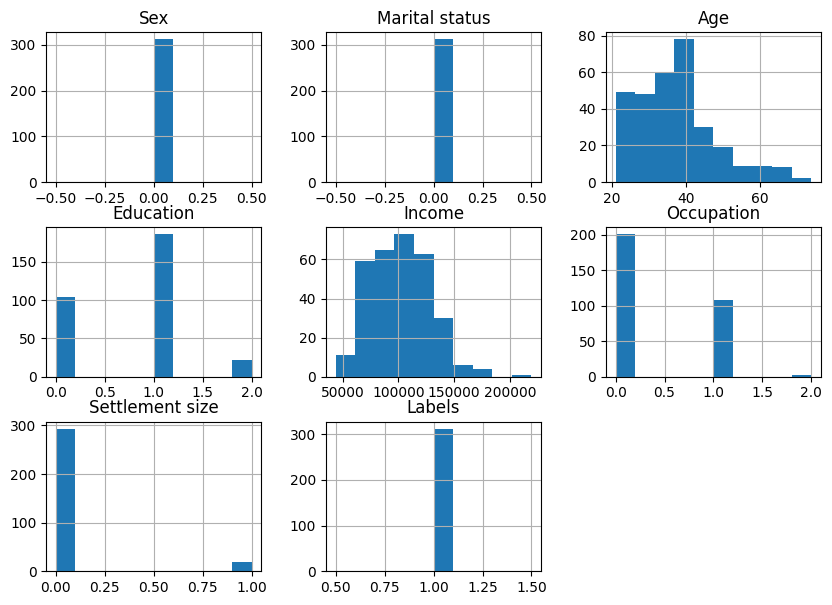

In [ ]:
results_df[results_df['Labels'] == 1].hist(figsize=(10,7))

Centroid as a mean untuk tau setiap cluster

In [ ]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns=results_df.columns[:7], index = ['C0', 'C1', 'C2', 'C3','C4', 'C5'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C0,1.000000e+00,1.000000e+00,0.403876,0.213953,0.005814,0.448891,0.375836
C1,3.885781e-16,1.332268e-15,0.245726,0.182692,0.030449,0.451144,0.484804
C2,2.553513e-15,1.776357e-15,0.274017,0.633462,0.764990,0.615822,0.524984
C3,-3.885781e-16,1.000000e+00,0.422827,0.466926,0.459144,0.530253,0.409658
C4,1.000000e+00,1.498801e-15,0.310861,0.185393,0.036517,0.433188,0.439125
C5,1.000000e+00,1.000000e+00,0.444444,0.591503,0.676471,0.585119,0.405291


In [ ]:
pip install graphviz

Descision Tree untuk intrepert Cluster

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [ ]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf=5)
x_clus = results_df.drop(['Labels'], axis=1)
y_clus = results_df['Labels']

clf.fit(x_clus,y_clus)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

Evaluate

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

pred = clf.predict(x_clus)
print(classification_report(y_clus, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       0.96      1.00      0.98       312
           2       1.00      0.98      0.99       517
           3       1.00      1.00      1.00       257
           4       1.00      1.00      1.00       178
           5       1.00      0.99      1.00       306

    accuracy                           0.99      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       0.99      0.99      0.99      2000



Clustering Tree as Model Interpretability

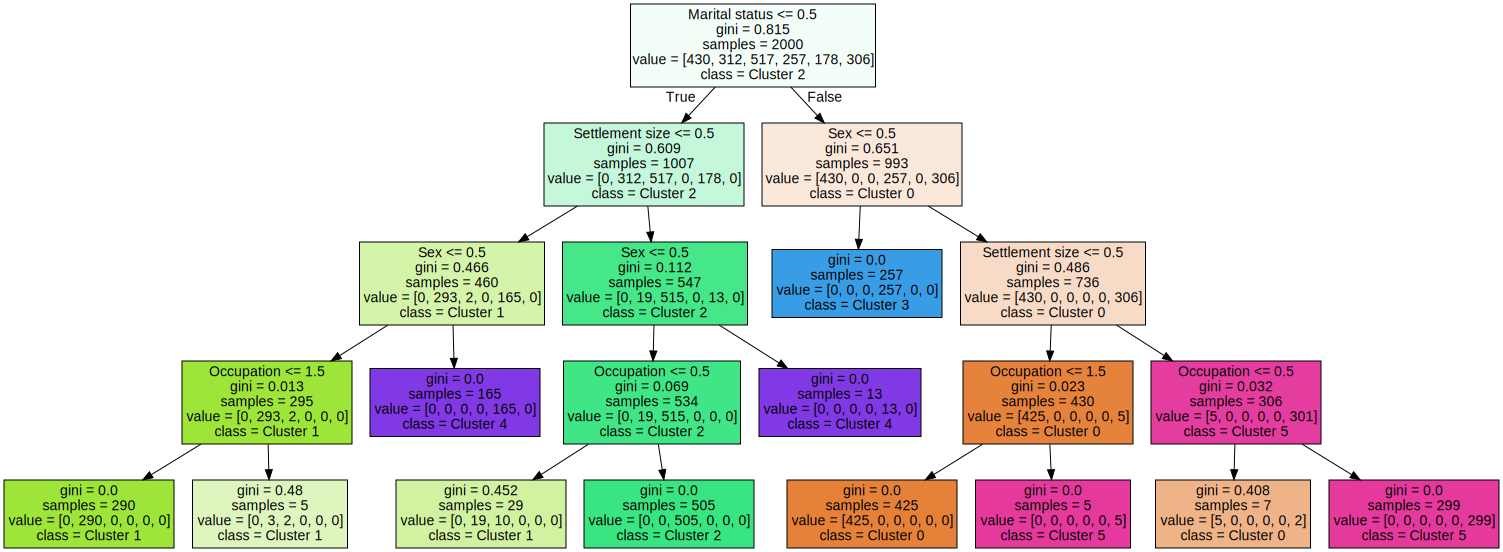

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = results_df.columns[:7],
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'],
                                filled=True)

graph = graphviz.Source(dot_data, format='png')
graph